# Psychoinformatics - Week 15 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## 1 Audio Processing

### 1.1 Audio Signals

In [2]:
#!pip install librosa
import librosa
import librosa.display

#### 1.1.1 Synthesized

In [14]:
# Signal consturction:

sampleRate = 44100 # sampling frequency (Hz)
frequency = 20000 # tone frequency (Hz)
doremi = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25] # tone frequency (Hz)
length = 1 # tone duration (second)

t = np.linspace(0, length, sampleRate*length+1)  #  Produces a 1 second Audio-File
print(t)
# y = np.sin(5*2*np.pi*t) #frequency=5Hz
y = np.concatenate([np.sin(freq*2*np.pi*t) for freq in doremi])

ipd.Audio(y,rate=sampleRate)

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 9.99954649e-01
 9.99977324e-01 1.00000000e+00]


In [15]:
# Signal Visualization:
librosa.display.waveplot(y, sampleRate);

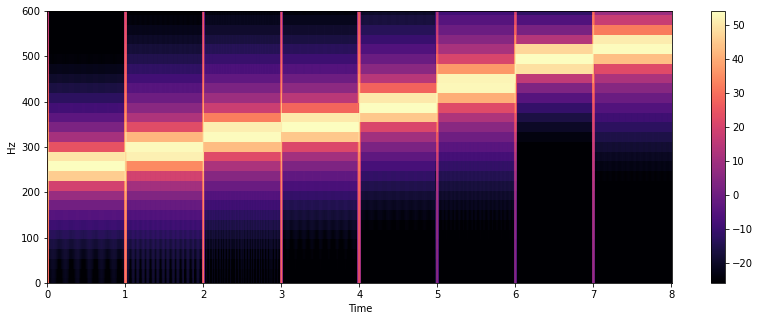

In [ ]:
# Show Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.ylim([0,600]); plt.colorbar();

#### 1.1.2 Real-world signals
WAV formats are described <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#r7015bff88555-1">here</a>.

In [ ]:
y, sr = librosa.load('speech/anger/52_M_A_8.wav',sr=None,mono=True)
print(sr,y.shape,y.dtype)

44100 (182272,) float32


In [ ]:
ipd.Audio(y,rate=sr)

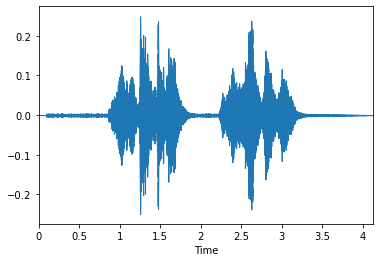

In [ ]:
# Time domain:
librosa.display.waveplot(y, sr);

In [ ]:
# Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.colorbar();

(20, 357)
[-5.1851434e+02  1.0895300e+02  2.9087120e+01  6.3047400e+00
  1.1638897e+01  1.2783336e+01  7.9373598e+00  1.7709998e+00
 -2.3316591e+00 -6.5337820e+00 -4.3073864e+00  8.1381994e-01
 -7.9005367e-01 -2.7049613e-01  2.2183290e+00  1.9682354e-01
 -3.2817330e+00 -7.1311054e+00 -5.0332079e+00  2.4407238e-01]


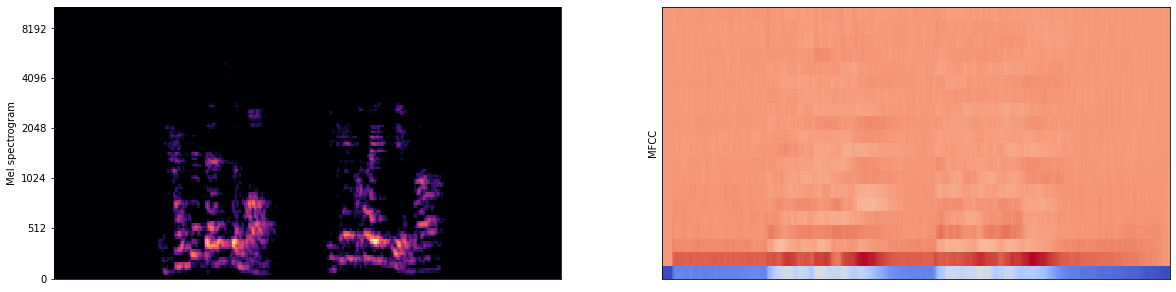

In [ ]:
# Cepstrum & Spectral Features:

M = librosa.feature.melspectrogram(y=y, sr=sr)
MFCC = librosa.feature.mfcc(y=y, sr=sr)

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(M), y_axis='mel')
plt.ylabel('Mel spectrogram');
plt.subplot(1,2,2)
librosa.display.specshow(MFCC)
plt.ylabel('MFCC');
print(MFCC.shape)
print(MFCC[:,10])

### 1.2 Machine Learning

Here is the <a href=https://github.com/tyiannak/pyAudioAnalysis/wiki>wiki</a> of pyAudioAnalysis

In [ ]:
#!pip install hmmlearn eyed3 pydub plotly # needed by pyAudioAnalysis
#!pip install pyaudioanalysis

#### 1.2.1 Emotion Classification


In [ ]:
# Training:

from pyAudioAnalysis import audioTrainTest as aT
aT.extract_features_and_train(["speech/anger","speech/happy"], 2.0, 2.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svm2emotions")

/Users/tren/opt/anaconda3/lib/python3.8/site-packages/pyAudioAnalysis/../pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 45.4 x realtime
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing file 3 of 10: speech/happy/56_F_H_7.wav
Analyzing file 4 of 10: speech/happy/59_F_H_7.wav
Analyzing file 5 of 10: speech/happy/62_F_H_6.wav
Analyzing file 6 of 10: speech/happy/66_F_H_6.wav
Analyzing file 7 of 10: speech/happy/68_M_H_6.wav
Analyzing file 8 of 10: speech/happy/69_M_H_7.wav
Analyzing file 9 of 10: speech/happy/74_F_H_

Param = 0.00100 - classifier Evaluation Experiment 161 of 501
Param = 0.00100 - classifier Evaluation Experiment 162 of 501
Param = 0.00100 - classifier Evaluation Experiment 163 of 501
Param = 0.00100 - classifier Evaluation Experiment 164 of 501
Param = 0.00100 - classifier Evaluation Experiment 165 of 501
Param = 0.00100 - classifier Evaluation Experiment 166 of 501
Param = 0.00100 - classifier Evaluation Experiment 167 of 501
Param = 0.00100 - classifier Evaluation Experiment 168 of 501
Param = 0.00100 - classifier Evaluation Experiment 169 of 501
Param = 0.00100 - classifier Evaluation Experiment 170 of 501
Param = 0.00100 - classifier Evaluation Experiment 171 of 501
Param = 0.00100 - classifier Evaluation Experiment 172 of 501
Param = 0.00100 - classifier Evaluation Experiment 173 of 501
Param = 0.00100 - classifier Evaluation Experiment 174 of 501
Param = 0.00100 - classifier Evaluation Experiment 175 of 501
Param = 0.00100 - classifier Evaluation Experiment 176 of 501
Param = 

Param = 0.00100 - classifier Evaluation Experiment 331 of 501
Param = 0.00100 - classifier Evaluation Experiment 332 of 501
Param = 0.00100 - classifier Evaluation Experiment 333 of 501
Param = 0.00100 - classifier Evaluation Experiment 334 of 501
Param = 0.00100 - classifier Evaluation Experiment 335 of 501
Param = 0.00100 - classifier Evaluation Experiment 336 of 501
Param = 0.00100 - classifier Evaluation Experiment 337 of 501
Param = 0.00100 - classifier Evaluation Experiment 338 of 501
Param = 0.00100 - classifier Evaluation Experiment 339 of 501
Param = 0.00100 - classifier Evaluation Experiment 340 of 501
Param = 0.00100 - classifier Evaluation Experiment 341 of 501
Param = 0.00100 - classifier Evaluation Experiment 342 of 501
Param = 0.00100 - classifier Evaluation Experiment 343 of 501
Param = 0.00100 - classifier Evaluation Experiment 344 of 501
Param = 0.00100 - classifier Evaluation Experiment 345 of 501
Param = 0.00100 - classifier Evaluation Experiment 346 of 501
Param = 

Param = 0.01000 - classifier Evaluation Experiment 5 of 501
Param = 0.01000 - classifier Evaluation Experiment 6 of 501
Param = 0.01000 - classifier Evaluation Experiment 7 of 501
Param = 0.01000 - classifier Evaluation Experiment 8 of 501
Param = 0.01000 - classifier Evaluation Experiment 9 of 501
Param = 0.01000 - classifier Evaluation Experiment 10 of 501
Param = 0.01000 - classifier Evaluation Experiment 11 of 501
Param = 0.01000 - classifier Evaluation Experiment 12 of 501
Param = 0.01000 - classifier Evaluation Experiment 13 of 501
Param = 0.01000 - classifier Evaluation Experiment 14 of 501
Param = 0.01000 - classifier Evaluation Experiment 15 of 501
Param = 0.01000 - classifier Evaluation Experiment 16 of 501
Param = 0.01000 - classifier Evaluation Experiment 17 of 501
Param = 0.01000 - classifier Evaluation Experiment 18 of 501
Param = 0.01000 - classifier Evaluation Experiment 19 of 501
Param = 0.01000 - classifier Evaluation Experiment 20 of 501
Param = 0.01000 - classifier 

Param = 0.01000 - classifier Evaluation Experiment 172 of 501
Param = 0.01000 - classifier Evaluation Experiment 173 of 501
Param = 0.01000 - classifier Evaluation Experiment 174 of 501
Param = 0.01000 - classifier Evaluation Experiment 175 of 501
Param = 0.01000 - classifier Evaluation Experiment 176 of 501
Param = 0.01000 - classifier Evaluation Experiment 177 of 501
Param = 0.01000 - classifier Evaluation Experiment 178 of 501
Param = 0.01000 - classifier Evaluation Experiment 179 of 501
Param = 0.01000 - classifier Evaluation Experiment 180 of 501
Param = 0.01000 - classifier Evaluation Experiment 181 of 501
Param = 0.01000 - classifier Evaluation Experiment 182 of 501
Param = 0.01000 - classifier Evaluation Experiment 183 of 501
Param = 0.01000 - classifier Evaluation Experiment 184 of 501
Param = 0.01000 - classifier Evaluation Experiment 185 of 501
Param = 0.01000 - classifier Evaluation Experiment 186 of 501
Param = 0.01000 - classifier Evaluation Experiment 187 of 501
Param = 

Param = 0.01000 - classifier Evaluation Experiment 342 of 501
Param = 0.01000 - classifier Evaluation Experiment 343 of 501
Param = 0.01000 - classifier Evaluation Experiment 344 of 501
Param = 0.01000 - classifier Evaluation Experiment 345 of 501
Param = 0.01000 - classifier Evaluation Experiment 346 of 501
Param = 0.01000 - classifier Evaluation Experiment 347 of 501
Param = 0.01000 - classifier Evaluation Experiment 348 of 501
Param = 0.01000 - classifier Evaluation Experiment 349 of 501
Param = 0.01000 - classifier Evaluation Experiment 350 of 501
Param = 0.01000 - classifier Evaluation Experiment 351 of 501
Param = 0.01000 - classifier Evaluation Experiment 352 of 501
Param = 0.01000 - classifier Evaluation Experiment 353 of 501
Param = 0.01000 - classifier Evaluation Experiment 354 of 501
Param = 0.01000 - classifier Evaluation Experiment 355 of 501
Param = 0.01000 - classifier Evaluation Experiment 356 of 501
Param = 0.01000 - classifier Evaluation Experiment 357 of 501
Param = 

Param = 0.50000 - classifier Evaluation Experiment 16 of 501
Param = 0.50000 - classifier Evaluation Experiment 17 of 501
Param = 0.50000 - classifier Evaluation Experiment 18 of 501
Param = 0.50000 - classifier Evaluation Experiment 19 of 501
Param = 0.50000 - classifier Evaluation Experiment 20 of 501
Param = 0.50000 - classifier Evaluation Experiment 21 of 501
Param = 0.50000 - classifier Evaluation Experiment 22 of 501
Param = 0.50000 - classifier Evaluation Experiment 23 of 501
Param = 0.50000 - classifier Evaluation Experiment 24 of 501
Param = 0.50000 - classifier Evaluation Experiment 25 of 501
Param = 0.50000 - classifier Evaluation Experiment 26 of 501
Param = 0.50000 - classifier Evaluation Experiment 27 of 501
Param = 0.50000 - classifier Evaluation Experiment 28 of 501
Param = 0.50000 - classifier Evaluation Experiment 29 of 501
Param = 0.50000 - classifier Evaluation Experiment 30 of 501
Param = 0.50000 - classifier Evaluation Experiment 31 of 501
Param = 0.50000 - classi

Param = 0.50000 - classifier Evaluation Experiment 191 of 501
Param = 0.50000 - classifier Evaluation Experiment 192 of 501
Param = 0.50000 - classifier Evaluation Experiment 193 of 501
Param = 0.50000 - classifier Evaluation Experiment 194 of 501
Param = 0.50000 - classifier Evaluation Experiment 195 of 501
Param = 0.50000 - classifier Evaluation Experiment 196 of 501
Param = 0.50000 - classifier Evaluation Experiment 197 of 501
Param = 0.50000 - classifier Evaluation Experiment 198 of 501
Param = 0.50000 - classifier Evaluation Experiment 199 of 501
Param = 0.50000 - classifier Evaluation Experiment 200 of 501
Param = 0.50000 - classifier Evaluation Experiment 201 of 501
Param = 0.50000 - classifier Evaluation Experiment 202 of 501
Param = 0.50000 - classifier Evaluation Experiment 203 of 501
Param = 0.50000 - classifier Evaluation Experiment 204 of 501
Param = 0.50000 - classifier Evaluation Experiment 205 of 501
Param = 0.50000 - classifier Evaluation Experiment 206 of 501
Param = 

Param = 0.50000 - classifier Evaluation Experiment 360 of 501
Param = 0.50000 - classifier Evaluation Experiment 361 of 501
Param = 0.50000 - classifier Evaluation Experiment 362 of 501
Param = 0.50000 - classifier Evaluation Experiment 363 of 501
Param = 0.50000 - classifier Evaluation Experiment 364 of 501
Param = 0.50000 - classifier Evaluation Experiment 365 of 501
Param = 0.50000 - classifier Evaluation Experiment 366 of 501
Param = 0.50000 - classifier Evaluation Experiment 367 of 501
Param = 0.50000 - classifier Evaluation Experiment 368 of 501
Param = 0.50000 - classifier Evaluation Experiment 369 of 501
Param = 0.50000 - classifier Evaluation Experiment 370 of 501
Param = 0.50000 - classifier Evaluation Experiment 371 of 501
Param = 0.50000 - classifier Evaluation Experiment 372 of 501
Param = 0.50000 - classifier Evaluation Experiment 373 of 501
Param = 0.50000 - classifier Evaluation Experiment 374 of 501
Param = 0.50000 - classifier Evaluation Experiment 375 of 501
Param = 

Param = 1.00000 - classifier Evaluation Experiment 34 of 501
Param = 1.00000 - classifier Evaluation Experiment 35 of 501
Param = 1.00000 - classifier Evaluation Experiment 36 of 501
Param = 1.00000 - classifier Evaluation Experiment 37 of 501
Param = 1.00000 - classifier Evaluation Experiment 38 of 501
Param = 1.00000 - classifier Evaluation Experiment 39 of 501
Param = 1.00000 - classifier Evaluation Experiment 40 of 501
Param = 1.00000 - classifier Evaluation Experiment 41 of 501
Param = 1.00000 - classifier Evaluation Experiment 42 of 501
Param = 1.00000 - classifier Evaluation Experiment 43 of 501
Param = 1.00000 - classifier Evaluation Experiment 44 of 501
Param = 1.00000 - classifier Evaluation Experiment 45 of 501
Param = 1.00000 - classifier Evaluation Experiment 46 of 501
Param = 1.00000 - classifier Evaluation Experiment 47 of 501
Param = 1.00000 - classifier Evaluation Experiment 48 of 501
Param = 1.00000 - classifier Evaluation Experiment 49 of 501
Param = 1.00000 - classi

Param = 1.00000 - classifier Evaluation Experiment 206 of 501
Param = 1.00000 - classifier Evaluation Experiment 207 of 501
Param = 1.00000 - classifier Evaluation Experiment 208 of 501
Param = 1.00000 - classifier Evaluation Experiment 209 of 501
Param = 1.00000 - classifier Evaluation Experiment 210 of 501
Param = 1.00000 - classifier Evaluation Experiment 211 of 501
Param = 1.00000 - classifier Evaluation Experiment 212 of 501
Param = 1.00000 - classifier Evaluation Experiment 213 of 501
Param = 1.00000 - classifier Evaluation Experiment 214 of 501
Param = 1.00000 - classifier Evaluation Experiment 215 of 501
Param = 1.00000 - classifier Evaluation Experiment 216 of 501
Param = 1.00000 - classifier Evaluation Experiment 217 of 501
Param = 1.00000 - classifier Evaluation Experiment 218 of 501
Param = 1.00000 - classifier Evaluation Experiment 219 of 501
Param = 1.00000 - classifier Evaluation Experiment 220 of 501
Param = 1.00000 - classifier Evaluation Experiment 221 of 501
Param = 

Param = 1.00000 - classifier Evaluation Experiment 370 of 501
Param = 1.00000 - classifier Evaluation Experiment 371 of 501
Param = 1.00000 - classifier Evaluation Experiment 372 of 501
Param = 1.00000 - classifier Evaluation Experiment 373 of 501
Param = 1.00000 - classifier Evaluation Experiment 374 of 501
Param = 1.00000 - classifier Evaluation Experiment 375 of 501
Param = 1.00000 - classifier Evaluation Experiment 376 of 501
Param = 1.00000 - classifier Evaluation Experiment 377 of 501
Param = 1.00000 - classifier Evaluation Experiment 378 of 501
Param = 1.00000 - classifier Evaluation Experiment 379 of 501
Param = 1.00000 - classifier Evaluation Experiment 380 of 501
Param = 1.00000 - classifier Evaluation Experiment 381 of 501
Param = 1.00000 - classifier Evaluation Experiment 382 of 501
Param = 1.00000 - classifier Evaluation Experiment 383 of 501
Param = 1.00000 - classifier Evaluation Experiment 384 of 501
Param = 1.00000 - classifier Evaluation Experiment 385 of 501
Param = 

Param = 5.00000 - classifier Evaluation Experiment 34 of 501
Param = 5.00000 - classifier Evaluation Experiment 35 of 501
Param = 5.00000 - classifier Evaluation Experiment 36 of 501
Param = 5.00000 - classifier Evaluation Experiment 37 of 501
Param = 5.00000 - classifier Evaluation Experiment 38 of 501
Param = 5.00000 - classifier Evaluation Experiment 39 of 501
Param = 5.00000 - classifier Evaluation Experiment 40 of 501
Param = 5.00000 - classifier Evaluation Experiment 41 of 501
Param = 5.00000 - classifier Evaluation Experiment 42 of 501
Param = 5.00000 - classifier Evaluation Experiment 43 of 501
Param = 5.00000 - classifier Evaluation Experiment 44 of 501
Param = 5.00000 - classifier Evaluation Experiment 45 of 501
Param = 5.00000 - classifier Evaluation Experiment 46 of 501
Param = 5.00000 - classifier Evaluation Experiment 47 of 501
Param = 5.00000 - classifier Evaluation Experiment 48 of 501
Param = 5.00000 - classifier Evaluation Experiment 49 of 501
Param = 5.00000 - classi

Param = 5.00000 - classifier Evaluation Experiment 192 of 501
Param = 5.00000 - classifier Evaluation Experiment 193 of 501
Param = 5.00000 - classifier Evaluation Experiment 194 of 501
Param = 5.00000 - classifier Evaluation Experiment 195 of 501
Param = 5.00000 - classifier Evaluation Experiment 196 of 501
Param = 5.00000 - classifier Evaluation Experiment 197 of 501
Param = 5.00000 - classifier Evaluation Experiment 198 of 501
Param = 5.00000 - classifier Evaluation Experiment 199 of 501
Param = 5.00000 - classifier Evaluation Experiment 200 of 501
Param = 5.00000 - classifier Evaluation Experiment 201 of 501
Param = 5.00000 - classifier Evaluation Experiment 202 of 501
Param = 5.00000 - classifier Evaluation Experiment 203 of 501
Param = 5.00000 - classifier Evaluation Experiment 204 of 501
Param = 5.00000 - classifier Evaluation Experiment 205 of 501
Param = 5.00000 - classifier Evaluation Experiment 206 of 501
Param = 5.00000 - classifier Evaluation Experiment 207 of 501
Param = 

Param = 5.00000 - classifier Evaluation Experiment 354 of 501
Param = 5.00000 - classifier Evaluation Experiment 355 of 501
Param = 5.00000 - classifier Evaluation Experiment 356 of 501
Param = 5.00000 - classifier Evaluation Experiment 357 of 501
Param = 5.00000 - classifier Evaluation Experiment 358 of 501
Param = 5.00000 - classifier Evaluation Experiment 359 of 501
Param = 5.00000 - classifier Evaluation Experiment 360 of 501
Param = 5.00000 - classifier Evaluation Experiment 361 of 501
Param = 5.00000 - classifier Evaluation Experiment 362 of 501
Param = 5.00000 - classifier Evaluation Experiment 363 of 501
Param = 5.00000 - classifier Evaluation Experiment 364 of 501
Param = 5.00000 - classifier Evaluation Experiment 365 of 501
Param = 5.00000 - classifier Evaluation Experiment 366 of 501
Param = 5.00000 - classifier Evaluation Experiment 367 of 501
Param = 5.00000 - classifier Evaluation Experiment 368 of 501
Param = 5.00000 - classifier Evaluation Experiment 369 of 501
Param = 

Param = 10.00000 - classifier Evaluation Experiment 22 of 501
Param = 10.00000 - classifier Evaluation Experiment 23 of 501
Param = 10.00000 - classifier Evaluation Experiment 24 of 501
Param = 10.00000 - classifier Evaluation Experiment 25 of 501
Param = 10.00000 - classifier Evaluation Experiment 26 of 501
Param = 10.00000 - classifier Evaluation Experiment 27 of 501
Param = 10.00000 - classifier Evaluation Experiment 28 of 501
Param = 10.00000 - classifier Evaluation Experiment 29 of 501
Param = 10.00000 - classifier Evaluation Experiment 30 of 501
Param = 10.00000 - classifier Evaluation Experiment 31 of 501
Param = 10.00000 - classifier Evaluation Experiment 32 of 501
Param = 10.00000 - classifier Evaluation Experiment 33 of 501
Param = 10.00000 - classifier Evaluation Experiment 34 of 501
Param = 10.00000 - classifier Evaluation Experiment 35 of 501
Param = 10.00000 - classifier Evaluation Experiment 36 of 501
Param = 10.00000 - classifier Evaluation Experiment 37 of 501
Param = 

Param = 10.00000 - classifier Evaluation Experiment 197 of 501
Param = 10.00000 - classifier Evaluation Experiment 198 of 501
Param = 10.00000 - classifier Evaluation Experiment 199 of 501
Param = 10.00000 - classifier Evaluation Experiment 200 of 501
Param = 10.00000 - classifier Evaluation Experiment 201 of 501
Param = 10.00000 - classifier Evaluation Experiment 202 of 501
Param = 10.00000 - classifier Evaluation Experiment 203 of 501
Param = 10.00000 - classifier Evaluation Experiment 204 of 501
Param = 10.00000 - classifier Evaluation Experiment 205 of 501
Param = 10.00000 - classifier Evaluation Experiment 206 of 501
Param = 10.00000 - classifier Evaluation Experiment 207 of 501
Param = 10.00000 - classifier Evaluation Experiment 208 of 501
Param = 10.00000 - classifier Evaluation Experiment 209 of 501
Param = 10.00000 - classifier Evaluation Experiment 210 of 501
Param = 10.00000 - classifier Evaluation Experiment 211 of 501
Param = 10.00000 - classifier Evaluation Experiment 212

Param = 10.00000 - classifier Evaluation Experiment 355 of 501
Param = 10.00000 - classifier Evaluation Experiment 356 of 501
Param = 10.00000 - classifier Evaluation Experiment 357 of 501
Param = 10.00000 - classifier Evaluation Experiment 358 of 501
Param = 10.00000 - classifier Evaluation Experiment 359 of 501
Param = 10.00000 - classifier Evaluation Experiment 360 of 501
Param = 10.00000 - classifier Evaluation Experiment 361 of 501
Param = 10.00000 - classifier Evaluation Experiment 362 of 501
Param = 10.00000 - classifier Evaluation Experiment 363 of 501
Param = 10.00000 - classifier Evaluation Experiment 364 of 501
Param = 10.00000 - classifier Evaluation Experiment 365 of 501
Param = 10.00000 - classifier Evaluation Experiment 366 of 501
Param = 10.00000 - classifier Evaluation Experiment 367 of 501
Param = 10.00000 - classifier Evaluation Experiment 368 of 501
Param = 10.00000 - classifier Evaluation Experiment 369 of 501
Param = 10.00000 - classifier Evaluation Experiment 370

Param = 20.00000 - classifier Evaluation Experiment 15 of 501
Param = 20.00000 - classifier Evaluation Experiment 16 of 501
Param = 20.00000 - classifier Evaluation Experiment 17 of 501
Param = 20.00000 - classifier Evaluation Experiment 18 of 501
Param = 20.00000 - classifier Evaluation Experiment 19 of 501
Param = 20.00000 - classifier Evaluation Experiment 20 of 501
Param = 20.00000 - classifier Evaluation Experiment 21 of 501
Param = 20.00000 - classifier Evaluation Experiment 22 of 501
Param = 20.00000 - classifier Evaluation Experiment 23 of 501
Param = 20.00000 - classifier Evaluation Experiment 24 of 501
Param = 20.00000 - classifier Evaluation Experiment 25 of 501
Param = 20.00000 - classifier Evaluation Experiment 26 of 501
Param = 20.00000 - classifier Evaluation Experiment 27 of 501
Param = 20.00000 - classifier Evaluation Experiment 28 of 501
Param = 20.00000 - classifier Evaluation Experiment 29 of 501
Param = 20.00000 - classifier Evaluation Experiment 30 of 501
Param = 

Param = 20.00000 - classifier Evaluation Experiment 192 of 501
Param = 20.00000 - classifier Evaluation Experiment 193 of 501
Param = 20.00000 - classifier Evaluation Experiment 194 of 501
Param = 20.00000 - classifier Evaluation Experiment 195 of 501
Param = 20.00000 - classifier Evaluation Experiment 196 of 501
Param = 20.00000 - classifier Evaluation Experiment 197 of 501
Param = 20.00000 - classifier Evaluation Experiment 198 of 501
Param = 20.00000 - classifier Evaluation Experiment 199 of 501
Param = 20.00000 - classifier Evaluation Experiment 200 of 501
Param = 20.00000 - classifier Evaluation Experiment 201 of 501
Param = 20.00000 - classifier Evaluation Experiment 202 of 501
Param = 20.00000 - classifier Evaluation Experiment 203 of 501
Param = 20.00000 - classifier Evaluation Experiment 204 of 501
Param = 20.00000 - classifier Evaluation Experiment 205 of 501
Param = 20.00000 - classifier Evaluation Experiment 206 of 501
Param = 20.00000 - classifier Evaluation Experiment 207

Param = 20.00000 - classifier Evaluation Experiment 366 of 501
Param = 20.00000 - classifier Evaluation Experiment 367 of 501
Param = 20.00000 - classifier Evaluation Experiment 368 of 501
Param = 20.00000 - classifier Evaluation Experiment 369 of 501
Param = 20.00000 - classifier Evaluation Experiment 370 of 501
Param = 20.00000 - classifier Evaluation Experiment 371 of 501
Param = 20.00000 - classifier Evaluation Experiment 372 of 501
Param = 20.00000 - classifier Evaluation Experiment 373 of 501
Param = 20.00000 - classifier Evaluation Experiment 374 of 501
Param = 20.00000 - classifier Evaluation Experiment 375 of 501
Param = 20.00000 - classifier Evaluation Experiment 376 of 501
Param = 20.00000 - classifier Evaluation Experiment 377 of 501
Param = 20.00000 - classifier Evaluation Experiment 378 of 501
Param = 20.00000 - classifier Evaluation Experiment 379 of 501
Param = 20.00000 - classifier Evaluation Experiment 380 of 501
Param = 20.00000 - classifier Evaluation Experiment 381

In [ ]:
# Testing:

from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.file_classification(file, "svm2emotions","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.file_classification(file, "svm2emotions","svm"))

speech/anger/55_F_A_3.wav (0.0, array([0.56649497, 0.43350503]), ['anger', 'happy'])
speech/anger/56_F_A_9.wav (0.0, array([0.76402054, 0.23597946]), ['anger', 'happy'])
speech/anger/65_M_A_8.wav (0.0, array([0.76410872, 0.23589128]), ['anger', 'happy'])
speech/anger/60_M_A_7.wav (0.0, array([0.76406984, 0.23593016]), ['anger', 'happy'])
speech/anger/54_F_A_1.wav (0.0, array([0.76401675, 0.23598325]), ['anger', 'happy'])
speech/anger/62_F_A_9.wav (0.0, array([0.76399234, 0.23600766]), ['anger', 'happy'])
speech/anger/52_M_A_8.wav (0.0, array([0.76411429, 0.23588571]), ['anger', 'happy'])
speech/anger/60_F_A_8_2.wav (0.0, array([0.70573108, 0.29426892]), ['anger', 'happy'])
speech/anger/60_F_A_8.wav (0.0, array([0.76398239, 0.23601761]), ['anger', 'happy'])
speech/anger/54_M_A_9.wav (0.0, array([0.74402505, 0.25597495]), ['anger', 'happy'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav (1.0, array([0.229240

#### 1.2.2 Regression

In [ ]:
# Training:
aT.feature_extraction_train_regression("speech/anger", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmAnger")
aT.feature_extraction_train_regression("speech/happy", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmHappy")

Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 42.9 x realtime
Regression task valence
Param		MSE		T-MSE		R-MSE
0.0010		7.54		1.54		7.73
0.0050		6.68		1.16		7.53
0.0100		7.49		0.89		8.69
0.0500		6.71		0.10		8.35
0.1000		5.78		0.10		7.12
0.2500		8.51		0.10		10.20
0.5000		4.96		0.10		6.15		 best
1.0000		5.80		0.10		7.26
5.0000		6.99		0.10		8.41
10.0000		5.33		0.10		6.62
Selected params: 0.50000
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing f

([0.3070465522949022], [0.28641975308642], [0.25])

In [ ]:
# Testing:
from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.file_regression(file,"svmAnger","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.file_regression(file,"svmHappy","svm"))

speech/anger/55_F_A_3.wav ([3.0996832332240514], ['valence'])
speech/anger/56_F_A_9.wav ([8.900292778355936], ['valence'])
speech/anger/65_M_A_8.wav ([8.100041507730092], ['valence'])
speech/anger/60_M_A_7.wav ([6.997101043501214], ['valence'])
speech/anger/54_F_A_1.wav ([1.099847045317711], ['valence'])
speech/anger/62_F_A_9.wav ([8.900443479525393], ['valence'])
speech/anger/52_M_A_8.wav ([7.900220315813487], ['valence'])
speech/anger/60_F_A_8_2.wav ([7.899847080013727], ['valence'])
speech/anger/60_F_A_8.wav ([7.899723694217654], ['valence'])
speech/anger/54_M_A_9.wav ([8.899900720995111], ['valence'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav ([6.100346840922712], ['valence'])
speech/happy/68_M_H_6.wav ([6.1000430402963906], ['valence'])
speech/happy/62_F_H_6.wav ([6.099770848576392], ['valence'])
speech/happy/56_F_H_7.wav ([6.90009624248029], ['valence'])
speech/happy/69_M_H_7.wav ([6.899781629982

#### 1.2.3 Segmentation

In [ ]:
from pyAudioAnalysis import audioSegmentation as aS
aS.mid_term_file_classification("speech/happy/51_F_H_6.wav", "svm2emotions", "svm")

(array([1., 1.]), ['anger', 'happy'], 0, array([], dtype=float64))

#### 1.2.4 Revisiting Emotion Classification using CNN
Here is an example from <a href="https://medium.com/manash-en-blog/building-a-dead-simple-word-recognition-engine-using-convnet-in-keras-25e72c19c12b">this article</a>.

In [ ]:
import os, librosa
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATA_PATH='./speech'

def wav2mfcc(file_path, max_len):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr)
    
    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    mfcc2 = mfcc.reshape(np.append(mfcc.shape,1)) # add the depth=1 dimension
    return mfcc2

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    # To get rid of the first hidden folder .ipynb_checkpoints:
    return labels[1:], label_indices[1:], to_categorical(label_indices[1:])

def save_data_to_array(path=DATA_PATH, max_pad_len=350):
    labels, _, _ = get_labels(path)
    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = glob('speech/'+label+'/*.wav')
        for wavfile in wavfiles:
            mfcc = wav2mfcc(wavfile, max_pad_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)
        
def get_train_test(split_ratio=0.9, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)
    print(labels)
    # Getting first arrays
    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [ ]:
# Data preprocessing:
save_data_to_array()

X_train, X_test, Y_train, Y_test = get_train_test()
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
Y_train_hot = to_categorical(Y_train) # 1-hot encoding
print(X_train.shape, Y_train_hot.shape)

['happy', 'anger']
(18, 20, 350, 1) (2, 20, 350, 1) (18,) (2,)
(18, 20, 350, 1) (18, 2)


In [ ]:
# Build the CNN model:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 350,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 19, 349, 32)       160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 174, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 50112)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                1603616   
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,603,842
Trainable params: 1,603,842
Non-trainable params: 0
____________________________________________

In [ ]:
# Training:
model.fit(X_train, Y_train_hot, batch_size=6, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 0s 32ms/step - loss: 85.8952 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 33ms/step - loss: 75.3239 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 38.1862 - accuracy: 0.5556
Epoch 4/20
3/3 [==============================] - 0s 33ms/step - loss: 41.8569 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 37.2405 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 8.5161 - accuracy: 0.7778
Epoch 7/20
3/3 [==============================] - 0s 33ms/step - loss: 26.3896 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 0s 33ms/step - loss: 5.6681 - accuracy: 0.6667
Epoch 9/20
3/3 [==============================] - 0s 31ms/step - loss: 10.3629 - accuracy: 0.5556
Epoch 10/20
3/3 [==============================] - 0s 36ms/step - loss: 1.5112 - accuracy: 0.8889
Epoch 11/20
3/3 [=====

In [ ]:
# Testing:
print(get_labels())
print('-'*100)
X = np.load('happy.npy')
print(np.round(model.predict(X)))
print('-'*100)
X = np.load('anger.npy')
print(np.round(model.predict(X)))

(['happy', 'anger'], array([1, 2]), array([[0., 1., 0.],
       [0., 0., 1.]], dtype=float32))
----------------------------------------------------------------------------------------------------
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------------------------------------------------------------------------------------
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## 2 Speech Processing

In [2]:
#!pip install SpeechRecognition google-api-python-client
import speech_recognition as sr

### 2.1 Offline Speech Recognition (file)

In [ ]:
r=sr.Recognizer()
s = sr.AudioFile('speech/happy/53_F_H_6.wav')

with s as source:
    audio = r.record(source, duration=4)
    
r.recognize_google(audio,language='zh-TW',show_all=True)

{'alternative': [{'transcript': '顏色真的很漂亮耶', 'confidence': 0.92599881},
  {'transcript': '顏色真的很漂亮'},
  {'transcript': '原色真的很漂亮耶'},
  {'transcript': '顏色真的很漂亮啊'},
  {'transcript': '色真的很漂亮耶'}],
 'final': True}

In [ ]:
s = sr.AudioFile('speech/happy/53_F_H_6.wav')

with s as source:
    audio1 = r.record(source, duration=2)
    audio2 = r.record(source, duration=2)
    
print(r.recognize_google(audio1,language='zh-TW',show_all=True))
print(r.recognize_google(audio2,language='zh-TW',show_all=True))

[]
{'alternative': [{'transcript': '顏色真的很漂亮耶', 'confidence': 0.90840042}, {'transcript': '顏色真的很漂亮'}, {'transcript': '顏色真的很漂亮啊'}, {'transcript': '原色真的很漂亮耶'}, {'transcript': '原色真的很漂亮'}], 'final': True}


### 2.2 Online Speech Recognition (microphone)

In [5]:
#!pip install pyaudio # dependency of speech_recognition
# If you fail to do the above, check out: https://medium.com/@jscinin/python-3-7-install-pyaudio-e7c75edbbef4

import speech_recognition as sr
r=sr.Recognizer()

with sr.Microphone() as source:
    print("Please wait. Calibrating microphone...") 
    #listen for 2 seconds and create the ambient noise energy level 
    r.adjust_for_ambient_noise(source, duration=1) 
    print("Say something!")
    audio=r.listen(source)
    
try:
    print(r.recognize_google(audio, language="zh-TW"))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("No response from Google Speech Recognition service: {0}".format(e))

Please wait. Calibrating microphone...
Say something!
這是一個測試


### 2.3 Speech Synthesis

In [ ]:
#!pip install gTTS
from gtts import gTTS
from pygame import mixer

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
filename='test7.mp3'
tts=gTTS(text='貨出得去,人進得來,大家發大財', lang='zh-TW') #try en
tts.save(filename)
mixer.init()
mixer.music.load(filename)
mixer.music.play()